In [1]:
# Importing the Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Samjeny\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Load the dataset
data = pd.read_csv('Reviews.csv')
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# 1. Analyze the customer reviews data, perform EDA and statistical tests to gather insights about the products
.

In [3]:
#EDA of dataset
data.shape

(568454, 10)

In [4]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [7]:
(data.isnull().sum()/len(data))*10000

Id                        0.000000
ProductId                 0.000000
UserId                    0.000000
ProfileName               0.281465
HelpfulnessNumerator      0.000000
HelpfulnessDenominator    0.000000
Score                     0.000000
Time                      0.000000
Summary                   0.474972
Text                      0.000000
dtype: float64

In [8]:
data = data.dropna()

In [9]:
data.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,568411.0,2.842274e+05,1.640990e+05,1.0,1.421145e+05,2.842240e+05,4.263415e+05,5.684540e+05
HelpfulnessNumerator,568411.0,1.743874e+00,7.636781e+00,0.0,0.000000e+00,0.000000e+00,2.000000e+00,8.660000e+02
HelpfulnessDenominator,568411.0,2.227876e+00,8.288752e+00,0.0,0.000000e+00,1.000000e+00,2.000000e+00,9.230000e+02
Score,568411.0,4.183309e+00,1.310368e+00,1.0,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
Time,568411.0,1.296261e+09,4.803792e+07,939340800.0,1.271290e+09,1.311120e+09,1.332720e+09,1.351210e+09


# 1a. Highest and lowest rating for the products. Percentage wise product ratings for the entire data
.

In [12]:
data.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...


In [13]:
#To find out how many profile name have rated the product as 1, 2, 3,4,5 Score on the products
Score = data.groupby('Score')['Score'].agg(['count'])
Score

,count
Score,
1,52264
2,29743
3,42638
4,80655
5,363111


In [14]:
Score['count'].sum()

568411

In [15]:
#to calaculate how many ProductId we are having in the dataset
Product_count=data['ProductId'].value_counts().count() #data['ProductId'].nunique()
Product_count

74258

In [16]:
#to claculate how many customers we are having in the dataset
Customer_count = data['ProfileName'].nunique()
Customer_count

218413

In [17]:
#to claculate how many ratings we are having in the dataset
Rating_count = data['UserId'].count()
Rating_count

568411

In [18]:
#to claculate how many UserIds we are having in the dataset
Userid_count = data['UserId'].nunique()
Userid_count 

256047

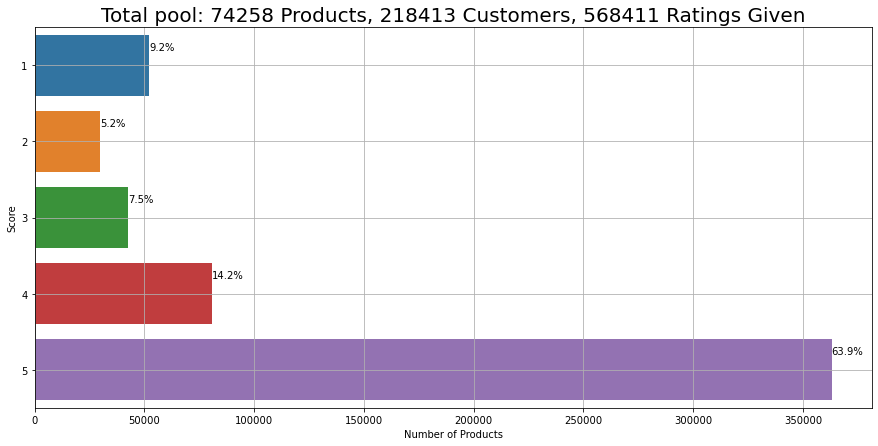

In [20]:
import numpy as np
# plot the graph
plt.figure(figsize = (15,7))

df = pd.DataFrame(np.array([['5'], ['4'], ['3'],['2'],['1']]), columns=['Score'])
ax = sns.countplot(y="Score", data=data)
plt.title(f'Total pool: {Product_count} Products, {Customer_count} Customers, {Rating_count} Ratings Given', fontsize=20)
plt.xlabel('Number of Products')

total = Score['count'].sum()
for p in ax.patches:
        percentage = '{:.1f}%'.format(100* p.get_width()/total)
        x = p.get_x() + p.get_width()+0.02
        y = p.get_y() + p.get_height()/4
        ax.annotate(percentage, (x, y))
        
plt.grid(True)
plt.show()

# 1b. Total number of reviews by unique profiles. How many customers or profiles have reviewed more than one product

In [21]:
#users that have rated less products and 
#also all those products that has been rated less in numbers

In [22]:
product_summary=data.groupby('ProductId').agg(['count'])

In [23]:
product_summary

,Id,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
,count,count,count,count,count,count,count,count,count
ProductId,,,,,,,,,
0006641040,37,37,37,37,37,37,37,37,37
141278509X,1,1,1,1,1,1,1,1,1
2734888454,2,2,2,2,2,2,2,2,2
2841233731,1,1,1,1,1,1,1,1,1
7310172001,173,173,173,173,173,173,173,173,173
...,...,...,...,...,...,...,...,...,...
B009UOFTUI,1,1,1,1,1,1,1,1,1
B009UOFU20,1,1,1,1,1,1,1,1,1


In [24]:
# no of reviews/score for unique ProductID
product_summary=data.groupby('ProductId')['Score'].agg(['count'])
product_summary

,count
ProductId,
0006641040,37
141278509X,1
2734888454,2
2841233731,1
7310172001,173
...,...
B009UOFTUI,1
B009UOFU20,1
B009UUS05I,1


In [25]:
product_summary.nunique()

count    284
dtype: int64

In [26]:
#Max reviews/Scores given 
product_summary.max()

count    913
dtype: int64

In [27]:
# Product with Maximun no of reviews
product_summary[product_summary['count']==913]

,count
ProductId,
B007JFMH8M,913


In [28]:
product_summary[product_summary['count']==913].count()

count    1
dtype: int64

In [29]:
product_summary.min()

count    1
dtype: int64

In [30]:
#no of products with only one review/score
product_summary[product_summary['count']==1]

,count
ProductId,
141278509X,1
2841233731,1
9376674501,1
B0000535LF,1
B00005C2JE,1
...,...
B009UOFTUI,1
B009UOFU20,1
B009UUS05I,1


In [31]:
product_summary[product_summary['count']==1].count()

count    30408
dtype: int64

In [32]:
dataset_cust_summary=data.groupby('UserId')['Score'].count().nunique()
dataset_cust_summary

144

In [33]:
# no of reviews/score given by unique UserID
cust_summary=data.groupby('UserId')['Score'].agg(['count'])
cust_summary

,count
UserId,
#oc-R103C0QSV1DF5E,1
#oc-R109MU5OBBZ59U,1
#oc-R10LFEMQEW6QGZ,1
#oc-R10LT57ZGIB140,1
#oc-R10UA029WVWIUI,1
...,...
AZZV9PDNMCOZW,3
AZZVNIMTTMJH6,1
AZZY649VYAHQS,1


In [34]:
cust_summary.max()

count    448
dtype: int64

In [35]:
#UserID that gave Maximun no of reviews
cust_summary[cust_summary['count']==448]

,count
UserId,
A3OXHLG6DIBRW8,448


In [36]:
cust_summary.min()

count    1
dtype: int64

In [37]:
# no of UserID that gave minimum no of reviews ie is 1
cust_summary[cust_summary['count']==1]

,count
UserId,
#oc-R103C0QSV1DF5E,1
#oc-R109MU5OBBZ59U,1
#oc-R10LFEMQEW6QGZ,1
#oc-R10LT57ZGIB140,1
#oc-R10UA029WVWIUI,1
...,...
AZZV61COVM8CA,1
AZZVNIMTTMJH6,1
AZZY649VYAHQS,1


In [38]:
# no of UserID that gave more than 1 review
cust_summary[cust_summary['count']>1]

,count
UserId,
#oc-R115TNMSPFT9I7,2
#oc-R11D9D7SHXIJB9,3
#oc-R11DNU2NBKQ23Z,2
#oc-R11O5J5ZVQE25C,3
#oc-R12KPBODL2B5ZD,2
...,...
AZZNK89PXD006,6
AZZTH6DJ0KSIP,3
AZZU1VEO8KUXH,3


In [39]:
# no of reviews/score given by unique profile_name
profile_summary=data.groupby('ProfileName')['Score'].agg(['count'])
profile_summary

,count
ProfileName,
,2
,2
,1
:Jury Duty:,4
"! MR. KNOW IT ALL ;-b ""DR SHOCK""",10
...,...
§§§ Raven §§§,1
Équité,1
Étaín d'Orphée,6


In [40]:
profile_summary.max()

count    451
dtype: int64

In [41]:
#Profilename that gave Maximun no of reviews
profile_summary[profile_summary['count']==451]

,count
ProfileName,
"C. F. Hill ""CFH""",451


In [42]:
#Profilename that gave Minimum no of reviews
profile_summary[profile_summary['count']==1]

,count
ProfileName,
,1
"! Metamorpho ;) ""Reflective and Wiser Seer""",1
!!!,1
"!AmY!K! ""!AmY!K!""",1
!Mamamia!,1
...,...
"~~C~~ ""Muzzle Nuzzles""",1
~~~*Bree*~~~,1
§§§ Raven §§§,1


In [43]:
#Profilename that gave more than one review
profile_summary[profile_summary['count']>1]

,count
ProfileName,
,2
,2
:Jury Duty:,4
"! MR. KNOW IT ALL ;-b ""DR SHOCK""",10
"""dmab6395""",3
...,...
~~~,2
~~~Carol,4
"¢¾ Leah ¢¾ ""Leah""",3


# 2. Perform sentiment analysis on the reviews data, and classify the reviews based on the sentiment associated with the same

In [44]:
data_reviews = data[[ 'Score','Text', 'Summary',]]
data_reviews.head()

,Score,Text,Summary
0,5,I have bought several of the Vitality canned d...,Good Quality Dog Food
1,1,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised
2,4,This is a confection that has been around a fe...,"""Delight"" says it all"
3,2,If you are looking for the secret ingredient i...,Cough Medicine
4,5,Great taffy at a great price. There was a wid...,Great taffy


# Approach1 with the Score

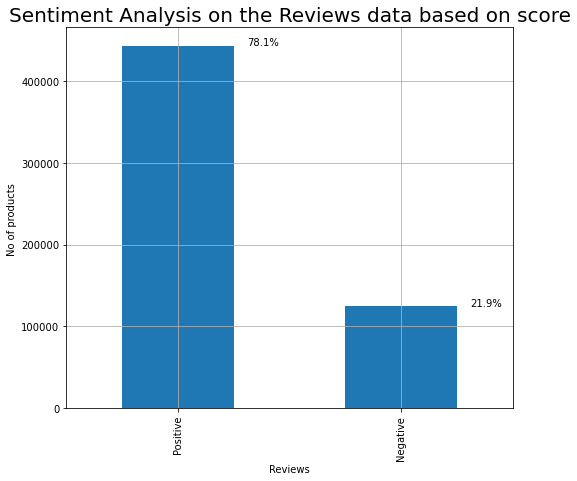

In [45]:
data_classify = data_reviews[data_reviews["Score"].notnull()]
data_classify["sentiment"] = data_classify["Score"] >= 4
data_classify["sentiment"] = data_classify["sentiment"].replace([True , False] , ["Positive" , "Negative"])
sentiment = data_classify["sentiment"] 

# Lets count positive and negative review
plt.figure(figsize = (8,7))
ax = data_classify["sentiment"].value_counts().plot.bar()
plt.title('Sentiment Analysis on the Reviews data based on score', fontsize=20)
plt.xlabel('Reviews')
plt.ylabel('No of products ')
plt.grid(True)

total = Score['count'].sum()
for p in ax.patches:
        percentage = '{:.1f}%'.format(100* p.get_height()/total)
        x = p.get_x() + p.get_width()+0.06
        y = p.get_y() + p.get_height()/1
        ax.annotate(percentage, (x, y))

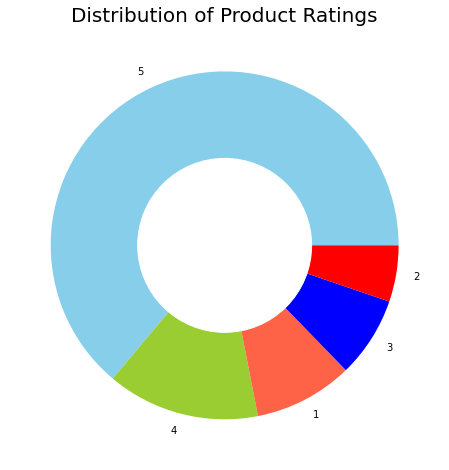

In [46]:
ratings = data["Score"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Product Ratings", fontsize=20)
plt.show()

# Approach2 with the comments

In [ ]:
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Text"]]
print(data.head())

In [ ]:
   Id   ProductId          UserId  ... Positive  Negative  Neutral
0   1  B001E4KFG0  A3SGXH7AUHU8GW  ...    0.305     0.000    0.695
1   2  B00813GRG4  A1D87F6ZCVE5NK  ...    0.000     0.138    0.862
2   3  B000LQOCH0   ABXLMWJIXXAIN  ...    0.155     0.091    0.754
3   4  B000UA0QIQ  A395BORC6FGVXV  ...    0.000     0.000    1.000
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T  ...    0.448     0.000    0.552

[5 rows x 13 columns]

In [ ]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂

In [ ]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  109328.1269999992
Negative:  24033.022999999564
Neutral:  435043.95799998916